<h3>This is a library to find the best performing configuration from a set of dimensions (i.e. schemas, partition, storage) which can be specified inside the <b>settings.yaml</b> file in the resource</h3>

<h2>Ranker</h2>

Load classes needed to run the experiment (i.e. SD Ranker, MD Ranker, Rank Validator) from the Ranker file

In [9]:
import Ranker

singleDimensionRanking = Ranker.SDRank()
multiDimensionRanking = Ranker.MDRank()
validation = Ranker.Validator()

calculateRankScore function is a single dimensional ranking criteria which is used to help provide high level view of the system performance across a set of tasks<br><br>
Ranking Score _R_ is applied independently for each dimensions. _R_ is a numerical value that represents the performance of an elemennt in a set<br><br>
The output of this method is a table of configurations which is sorted based on the best performing configuration according to their Ranking Score along with <br>
number of occurences of the dimension being placed at the rank _r_ (1st, 2nd, 3rd, ...)

In [10]:
# this method takes single dimension and dataset sizes that user specified inside their log files

schemaSDRank = singleDimensionRanking.calculateRankScore('schemas', '100M')
partitionSDRank = singleDimensionRanking.calculateRankScore('partition', '250M')
storageSDRank = singleDimensionRanking.calculateRankScore('storage', '100M')

In [11]:
partitionSDRank

,Rank 1,Rank 2,Rank 3,Result
st.subject.csv,6.0,5.0,0.0,0.772727
st.subject.avro,7.0,3.0,1.0,0.772727
pt.subject.avro,7.0,2.0,2.0,0.727273
pt.subject.csv,7.0,2.0,2.0,0.727273
vt.subject.csv,4.0,7.0,0.0,0.681818
vt.subject.avro,5.0,5.0,1.0,0.681818
vt.predicate.avro,6.0,2.0,3.0,0.636364
st.predicate.csv,4.0,3.0,4.0,0.500000
st.horizontal.avro,2.0,7.0,2.0,0.500000
pt.horizontal.csv,2.0,6.0,3.0,0.454545


Ranking over one dimension is insufficient when it counts multiple dimensions. The presence of trade-offs reduces the accuracy of single dimension ranking functions which can be seen in the radar plot below. Which is why we propose an optimization technique that aims to find the optimal non-dominated solutions or the configuration combinations by optimizing all dimensions at the same time which utilize the NSGA2 Algorithm

For this experiment, we provide two ways to use the NSGA2 Algorithm:
- The first is called paretoAgg which operates on the single dimensional ranking criteria. This method aims to maximize performance of the three ranks altogether
- The second is called paretoQ which apply the algorithm considering the rank sets obtained by sorting each query results individually. This method aims at minimizing query runtimes of the ranked dimensions

The output of this method is a table of the best configurations solution of all dimensions combined sorted from the best (Solution) and the worst configurations sorted from the worst (Dominated)

In [15]:
# pareto methods only take one parameter which is the dataset sizes of the experiment

paretoFronts_Q = multiDimensionRanking.paretoQ('250M')
paretoFronts_Agg = multiDimensionRanking.paretoAgg('100M')

In [16]:
paretoFronts_Agg

,Solution,Dominated
0,st.predicate.avro,st.horizontal.csv
1,pt.subject.csv,pt.predicate.csv
2,vt.predicate.avro,st.predicate.csv
3,st.horizontal.avro,st.subject.csv
4,vt.predicate.csv,pt.horizontal.csv
5,pt.subject.avro,pt.predicate.avro
6,st.subject.avro,vt.horizontal.csv
7,vt.subject.avro,vt.subject.csv
8,,vt.horizontal.avro
9,,pt.horizontal.avro


<h2>Visualization</h2>
*visualization can only be done with three dimension ranking configuration

plotRadar is a method show the presence of trade-offs by using the single dimension ranking criterion which reduce the accuracy of the other dimensions

In [3]:
# this method takes two parameters, the single dimension & the dataset size

singleDimensionRanking.plotRadar('storage', '100M')

This plot shows the performance of a single dimension parameters that users can choose in terms of their rank scores

<AxesSubplot:title={'center':'st'}>

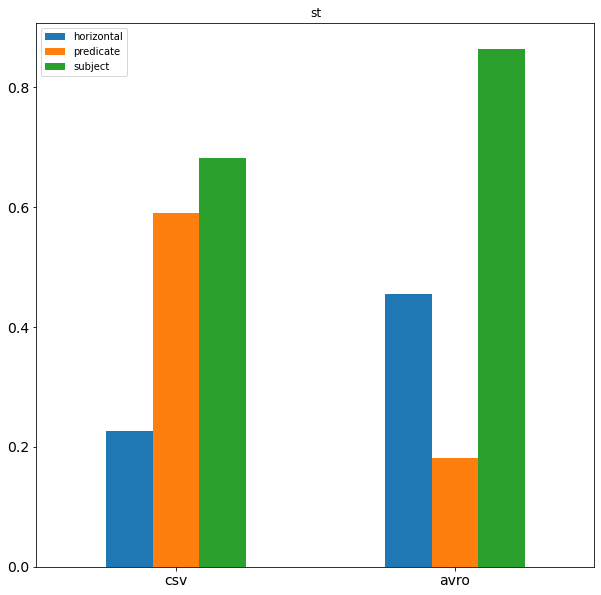

In [7]:
# this method takes three parameters which are the dimension, dataset size, and the choosen options that user wants to see

singleDimensionRanking.plot('partition', '100M', 'st')

This plot shows the solutions for __paretoAgg__ as dots shown in a three dimensional space

(8, 3) (10, 3)


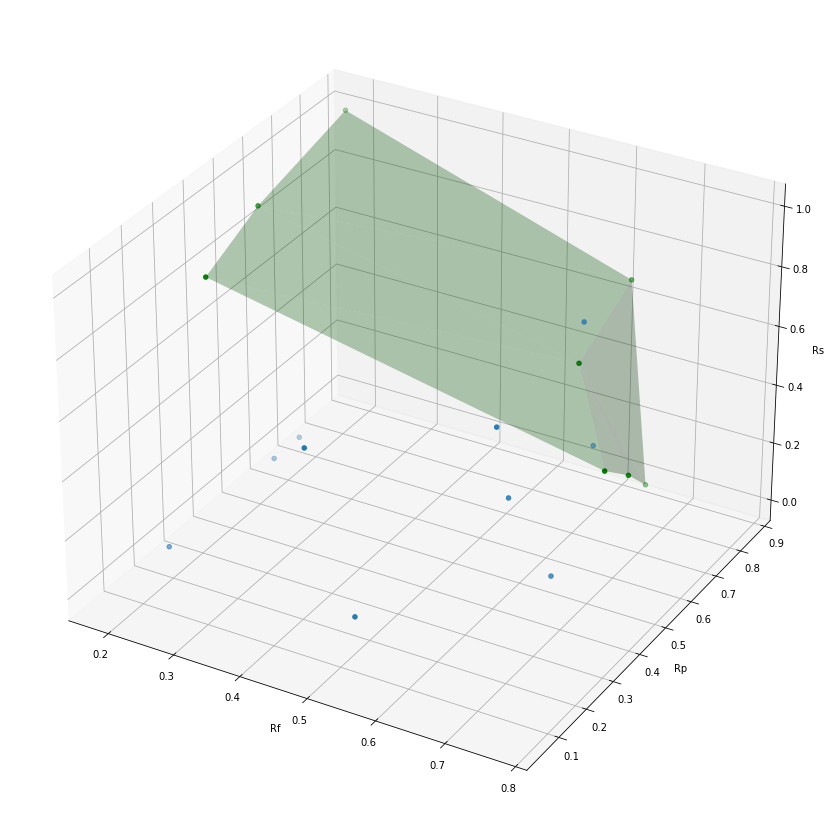

In [17]:
# this method takes one parameter, the dataset size of the experiment

multiDimensionRanking.plot('100M')

<h2>Rank Validation</h2>

This library provides two metrics of evaluation to evaluate the goodness of the ranking criteria the _conformance_ and _coherence_

- Conformance measures the adherence of the top-ranked configurations according to the actual query positioning of thoses configurations
- Coherence is the measure agreement between two ranking sets that uses the same ranking criteria accross different experiments

In [32]:
# both conformance and coherence methods takes a list of ranking criterion that the user can specify
# for conformance, it takes a dataset size for the user to specify, k value which is the value of the top-k subset of the ranking sets, and h value which is the threshold value that will be counted for conformance score
# for coherence, it counts the number of pairwise (dis)agreements between two ranking sets which in this case is the dataset sizes

conformance_set = ['schemas', 'partition', 'storage', 'paretoQ', 'paretoAgg']
coherence_set = ['schemas', 'partition', 'storage', 'paretoQ', 'paretoAgg']

conf = validation.conformance(conformance_set, '100M', 5, 15)
coh = validation.coherence(coherence_set, '100M', '250M')

In [33]:
conf

,100M
schemas,0.854545
partition,0.800000
storage,0.927273
paretoQ,0.818182
paretoAgg,0.927273


In [34]:
coh

,Kendall's Index
schemas,0.464052
partition,0.477124
storage,0.522876
paretoQ,0.076923
paretoAgg,0.285714
